<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import numpy as np
import math

# показываем  все строки : 
#pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 30)

pd.set_option('display.max_columns', None)

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data_rows_bef = data['total_images'].count() # переменная хранит изначальное количество строк
data.info()
#data.head(5)
data.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод

В основе данного исследования лежит таблица "real_estate_data.csv", содержащая 22 столбца с 23699 строками, однако в разных столбцах количество ненулевых ячеек отличатся, в некоторых столбцах значения не соответствуют типу, заявленному в документации. 
Так в описании к данных указано, что столбец "is_apartment" должен иметь булев тип, однако вызов команды .info() говорит о том, что этот столбец содержит тип данных "object".
Вывод первых пяти строк показал большое количество пропусков в различных столбцах и строках. 
Вызов функции tail() показал, что в объявлениях, расположенных за пределами Санкт - Петербурга могут отсутствовать практически все значения. Однако, эта гипотеза требует дполонительной проработки. 
Из всего выгеописанного можно сделать вывод, что таблица неоднородна и требует предобработки перед началом исследования.

## Предобработка данных

In [49]:
print('Было обнаружено', data.duplicated().sum(), 'дубликатов')
# найдём дубликаты.

Было обнаружено 0 дубликатов


In [50]:
data['last_price']=data['last_price']/10**6 
# Для удобства восприятия информации укажем цену за объект в миллионах рублей. 

In [51]:
data['total_images']=data['total_images'].astype('int')
#значения в столбце количества фотографий переведём в целочисленный тип для соответсвия закладываемому значению столбца

In [52]:
# Переведём значения в столбце 'floors_total' в тип int для соответствия природе значений
data['floors_total'].fillna(0).astype('int')
data.loc[(data['floors_total'] == 0 ), 'floors_total'] = np.NaN

Для дальнейшей работы над исследованием уточним интерпретацию коэффициента корреляции (по Ивантеру Э.В., Коросову А.В., 1992):

сильная при коэффициенте корреляции r>0,70

средняя при 0,50<r<0,69;

умеренная при 0,30<r<0,49;

слабая  при 0,20<r<0,29;

очень слабая при r<0,19.

Коэффициент корреляции между общей и жилой площадью: 0.9395373338721491
Коэффициент корреляции между общей площадью и площадью кухни: 0.6091211711198314
Коэффициент корреляции между общей площадью и площадью кухни в однокомнатной квартире: 0.6859333443303641
Коэффициент корреляции между общей площадью и площадью кухни в двухкомнатной квартире: 0.7219725270005748
Коэффициент корреляции между жилой площадью и площадью кухни: 0.42867430668441225


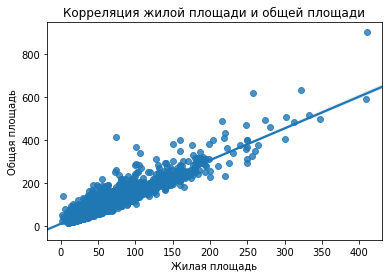

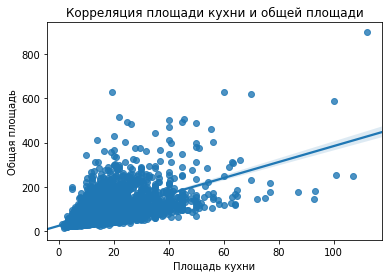

In [53]:
# Найдём связь столбец, значения в котором больше всего коррелируют с значениями общей площади помещений
fig, ax = plt.subplots()
sb.regplot('living_area', 'total_area', data=data)
ax.set_title('Корреляция жилой площади и общей площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Общая площадь')
fig, ax = plt.subplots()
sb.regplot('kitchen_area', 'total_area', data=data)
ax.set_title('Корреляция площади кухни и общей площади')
plt.xlabel('Площадь кухни')
plt.ylabel('Общая площадь')
print('Коэффициент корреляции между общей и жилой площадью:',data['living_area'].corr(data['total_area']))
print('Коэффициент корреляции между общей площадью и площадью кухни:',data['kitchen_area'].corr(data['total_area']))
print('Коэффициент корреляции между общей площадью и площадью кухни в однокомнатной квартире:',data.loc[data['rooms']==1,'kitchen_area'].corr(data.loc[data['rooms']==1,'total_area']))
print('Коэффициент корреляции между общей площадью и площадью кухни в двухкомнатной квартире:',data.loc[data['rooms']==2,'kitchen_area'].corr(data.loc[data['rooms']==2,'total_area']))
print('Коэффициент корреляции между жилой площадью и площадью кухни:',data['kitchen_area'].corr(data['living_area']))
# Можно убедиться, в существовании сильной взаимосвязи между общей и жилой площадью
# отметим, что существует взаимосвязь между общей площадью и площадью кухни, однако взаимосвязи между площадью кухни и жилой площадью, можно считать, что нет.

In [54]:
data_living_area = data[data['living_area'].isna() == False].copy()
data_living_area['middle_livind_area']= data_living_area['total_area']/ data_living_area['living_area']

living_const = data_living_area['middle_livind_area'].mean()

data['living_area'] = data['living_area'].fillna(0)

In [55]:
data.loc[data['living_area'] == 0, 'living_area']= round(data.loc[data['living_area'] == 0 ,'total_area']/ living_const,1)
# вычисляем жилую площадь исходя из медианы

In [56]:
data_kitchen_area = data[data['kitchen_area'].isna() == False].copy()
data['kitchen_area'] = data['kitchen_area'].fillna(0)
kitchen_area_consts = []
for i in range(1,20):
    data_kitchen_area.loc[data_kitchen_area['rooms']== i, 'middle_kitchen_area']= data_kitchen_area.loc[data_kitchen_area['rooms']== i,'total_area']/ data_kitchen_area.loc[data_kitchen_area['rooms']== i,'kitchen_area']
    kitchen_area_consts.append(data_kitchen_area.loc[data_kitchen_area['rooms']== i,'middle_kitchen_area'].mean())
    data.loc[((data['kitchen_area'] == 0) & (data['rooms'] == i)), 'kitchen_area']= round((data.loc[((data['kitchen_area'] == 0) &  (data['rooms'] == i)),'total_area']/ kitchen_area_consts[i-1]),1)

In [57]:
data['balcony']=data['balcony'].fillna(0).astype('int') 
# понимаем, что в этом объявлении информация о количестве балконов отсутствует

#data.loc[((data['kitchen_area'] == 0)), 'total_area'].value_counts(bins= 30)
# Можно увидеть, что если комнат 0, то и площадь кухни 0. Не все из них помечены как студии, хотя, я бы назвал их студиями

In [58]:
#display(data['locality_name'].nunique())
# 364 уникальных значения
data['locality_name'].value_counts()

data.loc[data['locality_name'] == 'посёлок Мурино', 'locality_name']= 'Мурино'
data.loc[data['locality_name'] == 'поселок Мурино', 'locality_name']= 'Мурино'

Мурино обрёл статус города с 2019.
Проверка написания 10 крупнейших городов Лен.Области показала, что разница в написании есть только у Мурино. Причём есть 3 варианта написания: Мурино, посёлок Мурино и поселок Мурино. Все они были объеденине в одно название
у 8 определить вообще нельзя.
С помощью сторонних сервиса https://www.calcmaps.com/ru/map-radius/ можно заметить, что если построить окружность, с центром на дворцовой площади и захватить такие города спутники, являющиеся частью города федерального значения Санкт- Петербург, как Пушкин и Колпино, то радиус получившейся окружности будет около 25 км.
Будем считать, что квартиры, расстояние у которых до центра не более 25 км. находятся в Петербурге.
Тем самым мы получим, что процент данных, без пренадлежности к какому-либо из городов менее 1%. Эти данные будут удалены из дальнейшего исследования, исходя из невозможнсти точно установить их принадлежность к одному из городов


In [59]:
#Воспользуемся Яндекс.Картами чтобы заполнить пропуски для 13 городов с самым большим количеством объявлений.
city_distance = {
    'locality_name': ['Мурино','Всеволожск','Гатчина', 'деревня Кудрово', 'Выборг', 'Кудрово', 'деревня Новое Девяткино', 'Сертолово',
            'Кириши', 'Сланцы', 'Волхов', 'Тосно', 'Кингисепп', 'Никольское','Коммунар', 'Сосновый Бор', 'Кировск', 'Отрадное', 'Приозерск'],
        'cityCenters_nearest': [14000, 21000, 43000, 12000, 122000, 12000, 16000, 24000, 110000, 154000, 115000, 55000, 113000, 38000, 35000,
                                68000, 39000, 33000, 123000]
}
df = pd.DataFrame(city_distance)

for i in range(len(df['locality_name'])):
    data.loc[data['locality_name'] == df.loc[i,'locality_name'], 'cityCenters_nearest'] = df.loc[i,'cityCenters_nearest']
    

data.loc[(data['locality_name'] == 0 ), 'locality_name'] = np.NaN

In [60]:
data.loc[data['parks_nearest'].isna(), 'parks_around3000'].unique()
# получили, что если parks_nearest = Nan, тогда parks_around3000- 0., nan
data.loc[data['parks_nearest']==0, 'parks_around3000']
# получили, что если parks_nearest = 0, тогда parks_nearest- ничего
data.loc[data['parks_around3000'].isna(), 'parks_nearest'].unique()
# получили, что если parks_around3000 = Nan, тогда parks_nearest- nan
data.loc[data['parks_around3000']==0, 'parks_nearest'].unique()
# получили, что если parks_around3000 = 0, тогда parks_nearest- nan, 3064., 3190., 3013.]

# Будем считать, что если в Санкт-Петербурге и ЛО если где-то есть водоём, то там рядом обязательно должен быть парк. Поэтому, если в таблице указано расстояние до ближайшего водоёма, но не указно расстояние до ближайшего парка, то расстояние до ближайшего парка будет равно расстоянию до ближайшего водоёма.
data.loc[data['parks_nearest'].isna() & data['ponds_nearest'] !=0, ['parks_nearest']]= data.loc[data['parks_nearest'].isna(), 'ponds_nearest'] 

**Вывод**

На данном этапе датасет был изучен на предмет наличия дубликатов (выявлены не были). В столбце "last_price" все значения пересчитываются в млн. рублей для облегчения восприятия численных значений в дальнейшем исследовании. В столбце «total_images» все значения приводятся к типу int.

Были изучены значения в столбце 'floors_total’. Была выдвинута гипотеза о том, что если в этом столбце пропущены значения, это значит, что здание, в котором находится квартира, имеет один этаж. Однако  изучение данных показало, что если в столбце пропущены значения общего числа этажей пропуск, в столбце этажа, на котором располагается квартира могут быть различные ненулевые значения. Не имея возможности получить дополнительную информацию по этим данным, мы не будем заполнять имеющиеся пропуски, но переведём все имеющиеся значения к типу int.

Затем был произведён анализ с целью установления  меры корреляции значений в столбце ’total_area’ с значениями в других столбцах. 
На данном этапе были представлены графики, которые показывают наличие значений, похожих на выброс, однако детальная работа над ними была проделана в последующих этапах (согласно данным рекомендациям).

Согласно полученным данным, отметим, что существует сильная корреляция между общей и жилой площадью. Эта взаимосвязь позволит нам заполнить пропуски. Отметим, что заполнять пропуски в 'total_area' не нужно т.к. в этой таблице таких пропусков нет.
Далее, согласно установленным связям, мы заполним пропуски в столбце 'kitchen_area’.
В столбце 'balcony’ все пропуски заполняем нулями считая, что если данных нет, это значит, что в квартире нет балкона.

Отдельно отметим, что существует взаимосвязь между числом комнат и площадью кухни. Если комнат 0, тогда и площадь кухни 0, однако только часть данных помещений помечена как студия. Отметим, что для дальнейшего исследовании значения в столбце studio не будут использоваться, поэтому, не имея чёткого представления о том, какими данными должен быть заполнен этот столбец, значения будут оставлены без изменений.
При изучении значений в столбце 'locality_name' было замечено расхождение написания названия населённого пункта Мурино. Частично, это связано с тем, что с 2019 года поселение имеет статус города. Дальнейший анализ 10 крупнейших городов Ленинградской области показал, что различий в написании нет.

Для дальнейшего исследования мы будем утверждать, что если квартира находится в радиусе 25 км. от центра, мы будем считать, что она находится в Санкт- Петербурге (число 25 получено входе построения окружности с центром на Дворцовой площади и захватом крайней северной и южной частей города)

Далее для квартир, для которых известен населённый пункт, но неизвестно расстояние до центра, было заполнено значение в столбце 'cityCenters_nearest' значения были взяты в Яндекс.Картах с учётом расстояния от центра населённого пункта, до Дворцовой площади.
В завершении была проведена проверка значений в столбцах 'parks_nearest’, 'parks_around3000’, 'ponds_nearest' с целью заполнения пропусков.

Важно отметить причину появления пропусков в столбцах. Хотя часть данных, согласно техническому заданию, была заполнена автоматически, однако главно причиной пропусков следует считать человеческий фактор. Можно предположить, что часть данных не была заполнена из-за того, что люди, вносившие значения, не знали часть данных и пропускали их или вносили показатели, не соответствующие действительности (этот аспект будет подробнее раскрыт в части 4). Важно отметить, что при этом большая часть данных выглядит достоверно из чего можно сделать вывод, что провести исследование возможно выборка является репрезентативной.

## Расчёты и добавление результатов в таблицу

In [61]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d') 
# не сложно заметить, что в столбце с датой время всегда 00:00:00. Для данного исследования округление с точностью до дня будет приемлемым.
# мы охватываем промежуток длинной в несколько лет, тому, округление с точностью до дня приемлемо
data.insert(4,'weekday', data['first_day_exposition'].dt.weekday)
data.insert(5,'month', pd.DatetimeIndex(data['first_day_exposition']).month)
data.insert(6,'year', pd.DatetimeIndex(data['first_day_exposition']).year)

s = pd.Series(['Пн.','Вт.', 'Ср.', 'Чт.', 'Пт.', 'Сб.', 'Вс.'])

for i in range(7):
    data.loc[data['weekday'] == i,'weekday'] = s[i]


In [15]:
data.insert(2,'price_per_meter', round((1000 * data['last_price']/data['total_area'])))
# цена квадратного метра в тысячах рублей

In [16]:
# создадим столбец, где будет указана категория этажа: первый-последний-другое
def floor_cat (row):
    # функция категоризирует значение этажа
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data.insert(9,'floor_category', data.apply(floor_cat, axis=1))

In [17]:
# добавим новые столбцы: соотношение жилой и общей площади, а также отношение площади кухни к общей в процентах
data.insert(11,'living_perc', round(data['living_area']/data['total_area']*100))
data.insert(17,'kitchen_perc', round(data['kitchen_area']/data['total_area']*100))

**Вывод**

В данном разделе была закончена подготовительная работа.

Значения в столбце "first_day_exposition" приводятся к виду: ГГГГ-ММ-ДД. Значения были приведены к типу datetime64, с точностью до дня, подобное округление приемлемо, если принять во внимание гипотезы исследования и промежуток времени, который захватывает данное исследование. В отдельный столбец были занесены дни недели, месяц и год, в которые объявление было размещено.

Были добавлены столбцы с ценой квадратного метра в тысячах рублей и процентами жилой площади и кухни к общей площади помещений.

Была произведена категоризация этажа квартиры: первый-последний-другой.


## Исследовательский анализ данных

In [1]:
# Изучим значения в столбце площадь
print(data['total_area'].describe())

plt.hist(data['total_area'], bins = 400)

plt.show()

sb.boxplot( x=data['total_area'])
plt.show()

# Можно заметить, что существуют значения, которые очень сильно выбиваются из общей картины.

NameError: name 'data' is not defined

In [76]:
#Пример функции. Код ревьюера
def plot_subs(feature, suptitle, title1, title2, xlabel1, xlabel2, ylabel1, xticks=None, xlim=None, bins=None):
    '''
    input:
        feature - название исследуемого признака
        suptitle - название графиков
        title1, title2 - название гистограммы и боксплота
        xlabel1, xlabel2 - название оси x гистограммы и боксплота
        ylabel1, ylabel2 - название оси y гистограммы и боксплота
    output:
        plots
    '''
    print(data[feature].describe())
    
    fig, axs = plt.subplots(1, 2, figsize=(18,7))
    plt.suptitle(suptitle, size=18)

    #Построение гистограммы
    data[feature].hist(bins=bins, ax=axs[0])
    axs[0].set_title(title1, size=13)
    axs[0].set_xlabel(xlabel1)
    axs[0].set_ylabel(ylabel1)


    #Построение боксплота
    sb.boxplot(x=feature, data=data, ax=axs[1])
    axs[1].set_title(title2, size=13)
    axs[1].set_xlabel(xlabel2)
    
    
    if xticks is not None:
        axs[0].set_xticks(xticks)
        axs[1].set_xticks(xticks)
    
    if xlim is not None:
        axs[0].set_xlim(xlim)
        axs[1].set_xlim(xlim)
        
    plt.show()    



count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


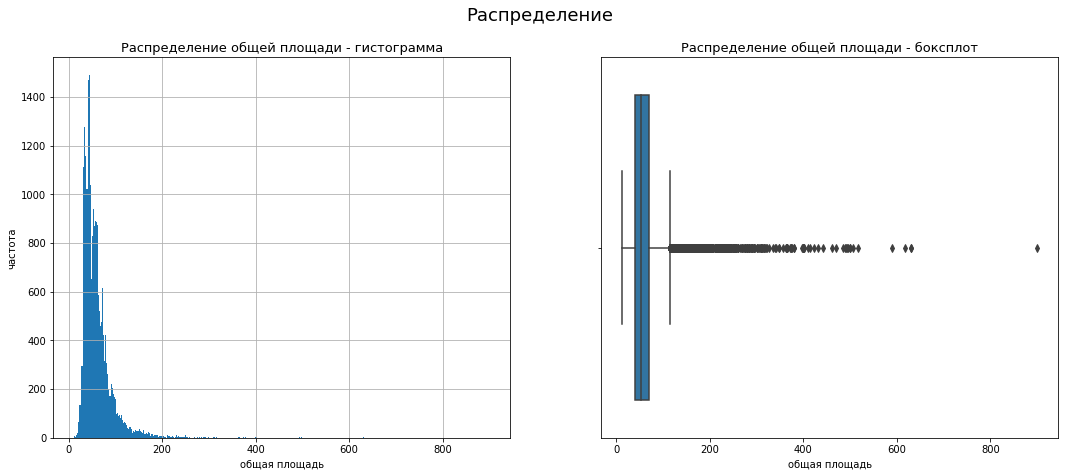

In [78]:
#Пример применения функции. Код ревьюера
plot_subs('total_area', 'Распределение', 'Распределение общей площади - гистограмма', 
          'Распределение общей площади - боксплот',
          'общая площадь', 'общая площадь', 'частота',  bins=400)

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


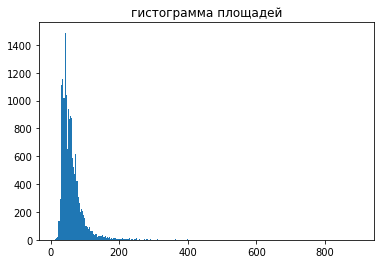

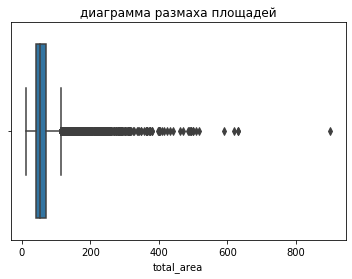

In [19]:
# Изучим значения в столбце площадь
print(data['total_area'].describe())

plt.hist(data['total_area'], bins = 400)
plt.title('гистограмма площадей')
plt.show()

plt.title('диаграмма размаха площадей')
sb.boxplot( x=data['total_area'])
plt.show()

Столбец ‘total_area' содержит 23699 ненулевых значения. Диаграмма размаха показывает большое количество выбросов справа от межквартильного размаха. Для дальнейшего исследования будут убраны значения превышающие 550 метров квадратных.

In [20]:
# отметим, что квартиры с метражом свыше 400 м2 находятся исключительно в СПб.
data.loc[(data['total_area'] > 400) & (data['locality_name'] != "Санкт-Петербург") ]

,total_images,last_price,price_per_meter,total_area,first_day_exposition,weekday,month,year,rooms,floor_category,ceiling_height,living_perc,floors_total,living_area,floor,is_apartment,studio,kitchen_perc,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64


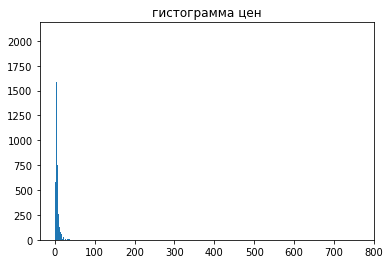

Text(0.5, 1.0, 'диаграмма размаха цен')

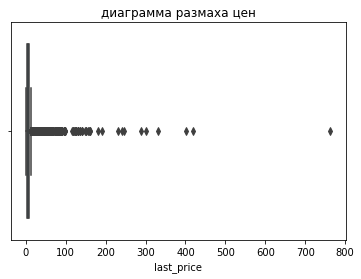

In [21]:
# Изучим значения в столбце цена
print(data['last_price'].describe())
#plt.xlim(0, 17)
plt.hist(data['last_price'], bins = 2000)
plt.title('гистограмма цен')
plt.show()
#plt.xlim(0, 17.5)
sb.boxplot( x=data['last_price'] )
plt.title('диаграмма размаха цен')
# отметим большое количество выбросов

Столбец 'last_price’. Для него характерны «выбросы» за пределами межквартильного размаха. 

Исходя из диаграммы размаха, из исследования будут удалены значения, превышающие 200 млн. рублей за квартиру.

count    23699.000000
mean        99.422170
std         50.309256
min          0.000000
25%         77.000000
50%         95.000000
75%        114.000000
max       1908.000000
Name: price_per_meter, dtype: float64


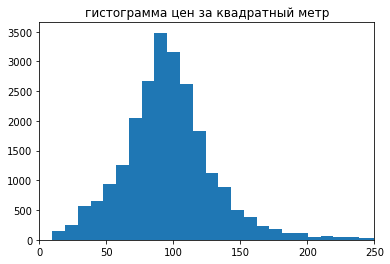

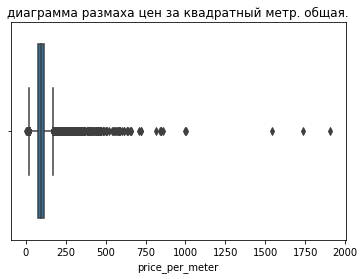

Text(0.5, 1.0, 'диаграмма размаха цен за квадратный метр. приближение левой части диаграммы.')

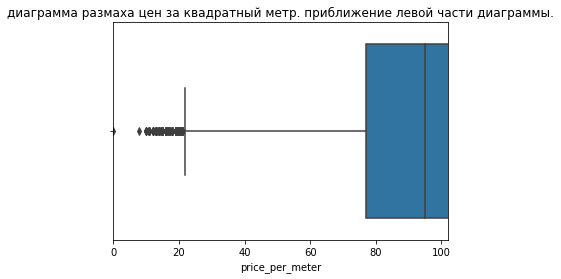

In [22]:
# Изучим значения в столбце цены за метр квадратный
print(data['price_per_meter'].describe())
plt.xlim(0, 250)
plt.hist(data['price_per_meter'], bins = 200)
plt.title('гистограмма цен за квадратный метр')
plt.show()

sb.boxplot( x=data['price_per_meter'] )
plt.title('диаграмма размаха цен за квадратный метр. общая.')
plt.show()
plt.xlim(0, 102)
sb.boxplot( x=data['price_per_meter'] )
plt.title('диаграмма размаха цен за квадратный метр. приближение левой части диаграммы.')

# делаем дополнительный анализ. Видим, что есть выбросы не только с права, но и слева от "усов"

Столбец 'price_per_meter’. При помощи диаграммы размаха мы можем установить, что существуют выбросы по цене не только справа от межквартильного размаха, но и слева от него. 

Примем во внимание, что в исследовании есть две категории: квартиры в Санкт-Петербурге и Ленинградской области. Данные в этих категориях неоднородны, что может привести к некорректной интерпретации понятия выброс. Построим две диаграммы размаха. Для Санкт-Петербурга и Ленинградской области в отдельности.

data[locality_name] == "Санкт-Петербург"
count    15721.000000
mean       114.850200
std         52.587064
min          0.000000
25%         91.000000
50%        105.000000
75%        124.000000
max       1908.000000
Name: price_per_meter, dtype: float64
data[locality_name] == "ЛО"
count    7978.000000
mean       69.020557
std        25.999770
min         8.000000
25%        52.000000
50%        69.000000
75%        85.000000
max       640.000000
Name: price_per_meter, dtype: float64


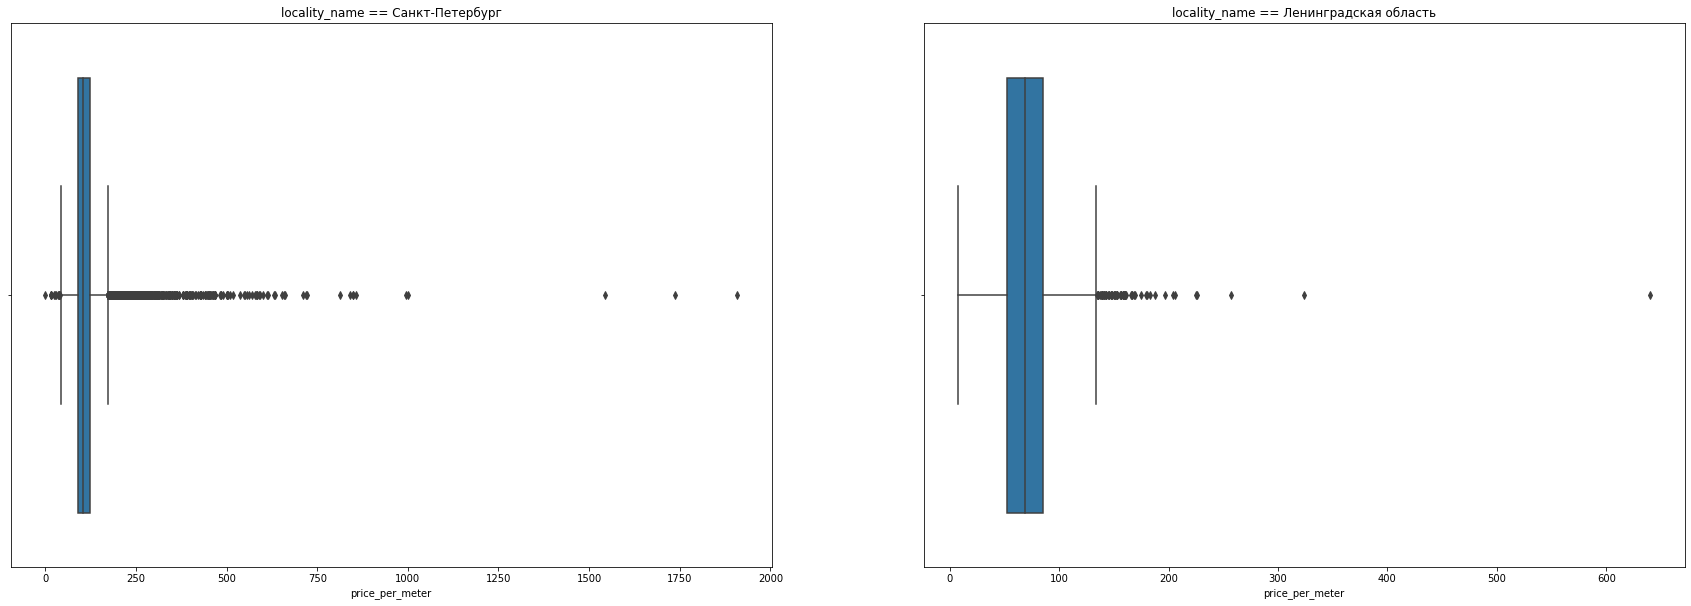

In [23]:
print('data[locality_name] == "Санкт-Петербург"')
print(data.loc[data['locality_name'] == 'Санкт-Петербург', 'price_per_meter'].describe())
print('data[locality_name] == "ЛО"')
print(data.loc[data['locality_name'] != 'Санкт-Петербург', 'price_per_meter'].describe())

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)

plt.title ("locality_name == Санкт-Петербург")
sb.boxplot(x=data.loc[data['locality_name'] == 'Санкт-Петербург', 'price_per_meter'])

ax2 = fig.add_subplot(122)
plt.title ("locality_name == Ленинградская область")

sb.boxplot( x=data.loc[data['locality_name'] != 'Санкт-Петербург', 'price_per_meter'] )

Внутри каждой категории значения отличаются сущесвенно, поэтому был проведён дополнительный анализ с учётом локации квартиры. Исходя из этого были обнаружены дополнительные аномалии.

Text(0.5, 1.0, 'Цена за квадратный метр в Санкт- Петербурге')

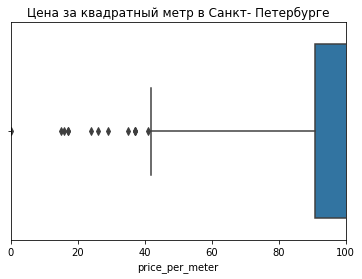

In [24]:
# рассмотрим внисательнее левый "ус" графика СПб
plt.show()
plt.xlim(0, 100)
sb.boxplot( x=data.loc[data['locality_name'] == 'Санкт-Петербург', 'price_per_meter'] )
plt.title('Цена за квадратный метр в Санкт- Петербурге')

По итогу узучения данных в столбце 'price_per_meter' из исследования были убраны предложения с ценой за квадратный метр превыашющей 600 т.р., находящиеся в Санкт- Петербурге и 200 т.р. за пределами СПб. Также были удалены квартиры, находящиеся в Санкт-Петербурге, но с ценой менее 40 т.р. за квадратный метр.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64
1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


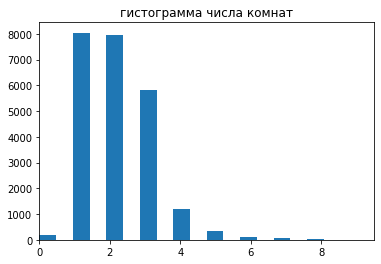

Text(0.5, 1.0, 'Диаграмма размаха количества комнат')

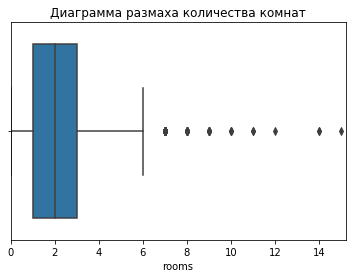

In [25]:
# Изучим значения в столбце числа комнат
print(data['rooms'].describe())
print(data['rooms'].value_counts())
plt.xlim(0, 9.5)
plt.hist(data['rooms'], bins = 40)
plt.title('гистограмма числа комнат')
plt.show()
plt.xlim(0, 15.2)
sb.boxplot( x=data['rooms'] )
plt.title('Диаграмма размаха количества комнат')

Столбец ‘rooms'. Здесь наблюдаются значения за пределами межквартильного размаха, однако изучение количества комнат и их средней площади говорит о правдоподобности подобных значений.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


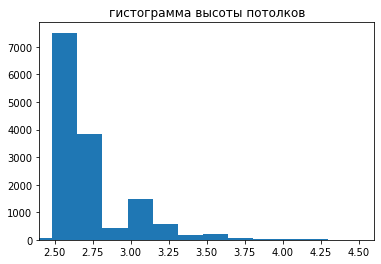

Text(0.5, 1.0, 'диаграмма рассеивания высоты потолков')

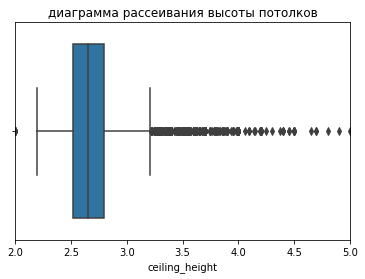

In [26]:
# Изучим значения в столбце высота потолков
print(data['ceiling_height'].describe())
plt.xlim(2.4, 4.6)
plt.hist(data['ceiling_height'], bins =  600)
plt.title('гистограмма высоты потолков')

plt.show()
plt.xlim(2, 5)
sb.boxplot( x=data['ceiling_height'] )
plt.title('диаграмма рассеивания высоты потолков')

Столбец 'ceiling_height’ имеет 14257 значений в промежутке от 1 до 100 метров. Изучение государственных нормативов по высоте потолков показало, что ниже 2,5 метров потолки не делаются. При этом, строгих нормативов о максимальной высоте потолков нет. Однако, исходя из общей практики, потолки не делают высотой более 4 метров. из исследования будут удалены значения, превышающие 4,5 метра и не достигающие 2,5 метров


<div style="border:solid green 2px; padding: 20px"> <b>Отлично:</b><br>
    Отличная работа, необходимые графики по всем параметрам мы вывели 👍 </div>       

In [27]:
data.loc[(data['ceiling_height']<2.5), ['ceiling_height']] = np.NaN
data.loc[(data['ceiling_height']>4.5), ['ceiling_height']] = np.NaN


Небольшой анализ показал, что в современных нормативных документов нет жёсткого регламента, относительно максимальной высоты потолков
Минимальная высота потолков не может быть меньше 2.5 метра
Однако, согласно существующей практике, в жилых помещениях не делают потолки выше 4 метров(http://expert-home.net/standartnaya-vysota-potolkov-v-kvartire/). 
Поэтому все помещения, где высота потолков более 4.5 метров, будут удалены из исследования как выброс.


count    23699.000000
mean        56.275792
std         10.133241
min          2.000000
25%         50.000000
50%         56.000000
75%         63.000000
max        100.000000
Name: living_perc, dtype: float64

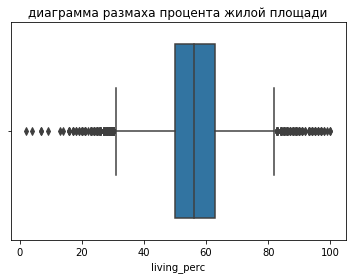

In [28]:
# изучим значения процент жилой площади
sb.boxplot(x= 'living_perc', data=data)
plt.title('диаграмма размаха процента жилой площади')

data['living_perc'].describe()


Столбец ‘living_perc' показывает отношение жилой площади к общей площади помещения. Диаграмма размаха показала большое количество выбросов как слева, так и справа от межквартильного размаха. Однако, исходя из понимания природы данных, выбросами будем считать только значения, находящиеся левее межквартильного размаха, т.е. менее 30%

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


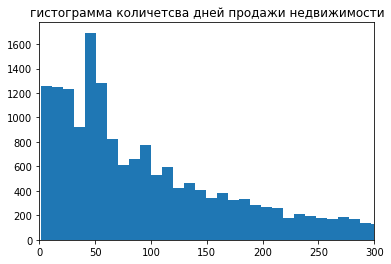

Text(0.5, 1.0, 'диаграмма размаха количетсва дней продажи недвижимости')

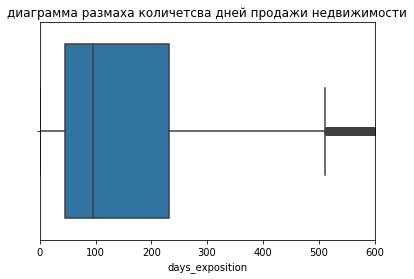

In [29]:
#Изучите время продажи квартиры. 
#Постройте гистограмму. 
#Посчитайте среднее и медиану. 
#Опишите, сколько обычно занимает продажа. 
#Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
print(data['days_exposition'].describe())
plt.xlim(0, 300)
plt.hist(data['days_exposition'], bins = 160)
plt.title('гистограмма количетсва дней продажи недвижимости')

plt.show()
plt.xlim(0, 600)
sb.boxplot( x=data['days_exposition'] )
plt.title('диаграмма размаха количетсва дней продажи недвижимости')

**Вывод**

Столбец ’days_exposition' имеет 20518 значений. Медиананное значение - 95 дней.  На гистограмме мы видим, что мода находится в промежутке 40-50 дней. Отдельно отметим, что Q1, первый квартиль равен 45. Из всего вышесказанного мы делаем вывод, что обычно продажа занимает от 40 до 232 дней. Если продажа занимает менее 40 дней, то можно говорить, что продажа прошла быстро. Если продажа затягивается на срок более 232 дней, значит продажа проходила необычно долго.


In [30]:
data = data.loc[data['total_area'] < 550 ]
data = data.loc[data['last_price'] < 200 ]
data = data.loc[data['price_per_meter'] < 600 ]
data = data.loc[data['living_perc'] > 30]
data = data.loc[((data['price_per_meter'] > 40) & (data['locality_name'] == 'Санкт-Петербург')) | (data['locality_name'] != 'Санкт-Петербург')]
data = data.loc[((data['price_per_meter'] < 650) & (data['locality_name'] == 'Санкт-Петербург')) | (data['locality_name'] != 'Санкт-Петербург')]
data = data.loc[((data['price_per_meter'] < 200) & (data['locality_name'] != 'Санкт-Петербург'))  | (data['locality_name'] == 'Санкт-Петербург')]

data_rows_aft = data['total_images'].count()

print("Процент сохранённых для исследования строк: {:.1%}".format(data_rows_aft / data_rows_bef))

Процент сохранённых для исследования строк: 98.9%


In [31]:
#Итоговый вид датасета, с которым ведётся работа:
data.head()

,total_images,last_price,price_per_meter,total_area,first_day_exposition,weekday,month,year,rooms,floor_category,ceiling_height,living_perc,floors_total,living_area,floor,is_apartment,studio,kitchen_perc,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,120.0,108.0,2019-03-07,Чт.,3,2019,3,другой,2.70,47.0,16.0,51.0,8,NaN,False,23.0,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,83.0,40.4,2018-12-04,Вт.,12,2018,1,первый,NaN,46.0,11.0,18.6,1,NaN,False,27.0,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,93.0,56.0,2015-08-20,Чт.,8,2015,2,другой,NaN,61.0,5.0,34.3,4,NaN,False,15.0,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,408.0,159.0,2015-07-24,Пт.,7,2015,3,другой,NaN,54.0,14.0,86.1,9,NaN,False,13.0,False,20.6,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.0,100.0,2018-06-19,Вт.,6,2018,2,другой,3.03,32.0,14.0,32.0,13,NaN,False,41.0,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [32]:
#Какие факторы больше всего влияют на стоимость квартиры? 
#Изучите, зависит ли цена от 
# -квадратного метра, 
# -числа комнат, 
# -этажа (первого или последнего), 
# -удалённости от центра.

print('Коэффициент корреляции между общей площадью и ценой:',data['total_area'].corr(data['last_price']))
print('Коэффициент корреляции между площадью кухни и ценой:',data['kitchen_area'].corr(data['last_price']))
print('Коэффициент корреляции между числом комнат и ценой:',data['rooms'].corr(data['last_price']))


print('Коэффициент корреляции между удалённостью от центра и ценой:',data['cityCenters_nearest'].corr(data['last_price']))

#print('Коэффициент корреляции между числом комнат и ценой:',data['rooms'].corr(data['last_price']))


Коэффициент корреляции между общей площадью и ценой: 0.7591123826423084
Коэффициент корреляции между площадью кухни и ценой: 0.5771207636025766
Коэффициент корреляции между числом комнат и ценой: 0.4561234062199834
Коэффициент корреляции между удалённостью от центра и ценой: -0.22946821471354845


In [33]:
# для вычисления коэффициента корреляции между категорией этажа и ценой квартиры проведём дополнительную категоризацию.
# отметим, что эта данная категоризация проводится отдельно для того, чтобы значения в таблице data оставались максимально наглядными. 




#print('Коэффициент корреляции между этажом и ценой:',data['floor_category_num'].corr(data['last_price']))

# можно с уверенностью сказать, что цены на первом этаже ниже, а выбор между последним и другим ноздря в ноздрю с небольшим перевесом другого


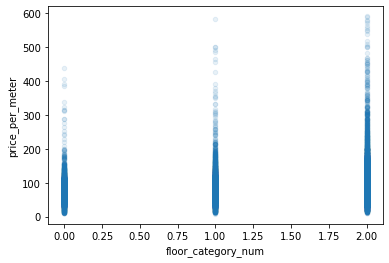

In [34]:
data.plot.scatter(x = 'floor_c ategory_num', y = 'price_per_meter', alpha = .1)
plt.show()

На данном графике разброса мы можем видеть как соотноситя категория этажа с ценой за квадратный метр.
Левый столбец соответствует разбросу цен для квартир на первом этаже, центральный - для квартир на последнем этаже, крайний правый- остальные этажи. 

Можно увидеть, что разброс цен для категории "другой" значительно больше, а также плотность значений заметно выше.

In [35]:
#Рассмотрим подробнее коэффициент корреляции между удалённостью от центра и ценой
print('Коэффициент корреляции между удалённостью от центра и ценой в Санкт- Петербурге :',data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'].corr(data['last_price']))

print('Коэффициент корреляции между удалённостью от центра и ценой в ЛО :',data[data['locality_name'] != 'Санкт-Петербург']['cityCenters_nearest'].corr(data['last_price']))

Коэффициент корреляции между удалённостью от центра и ценой в Санкт- Петербурге : -0.34664262964753567
Коэффициент корреляции между удалённостью от центра и ценой в ЛО : -0.2948903403833857


year,2014,2015,2016,2017,2018,2019
price_per_meter,124.904412,103.056973,97.471849,96.213889,97.199526,105.576098


Text(0.5, 1.0, 'Среднее значение цены за квадратный метр в разные годы')

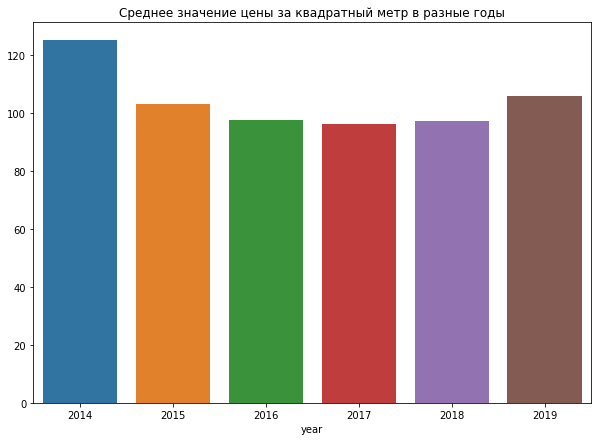

In [36]:
#Также изучите зависимость от даты размещения: дня недели, месяца и года. 
#Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 
#Эти данные можно найти по имени в столбце '*locality_name'*. "

data_bar_year = data.pivot_table(columns = 'year', values= 'price_per_meter', aggfunc= 'mean')

display(data_bar_year)

ax = plt.subplots(figsize=(10, 7))
ax=sb.barplot(data=data_bar_year)
ax.set_title('Среднее значение цены за квадратный метр в разные годы')

Изучим зависимость средней цены на недвижимость в зависимости от года.
На данной столбчатой диаграмме можно видеть, что существует неустойчивая тенденция к снижению средней цены на жильё. Обратимся к следующей таблице типа хитмэп.

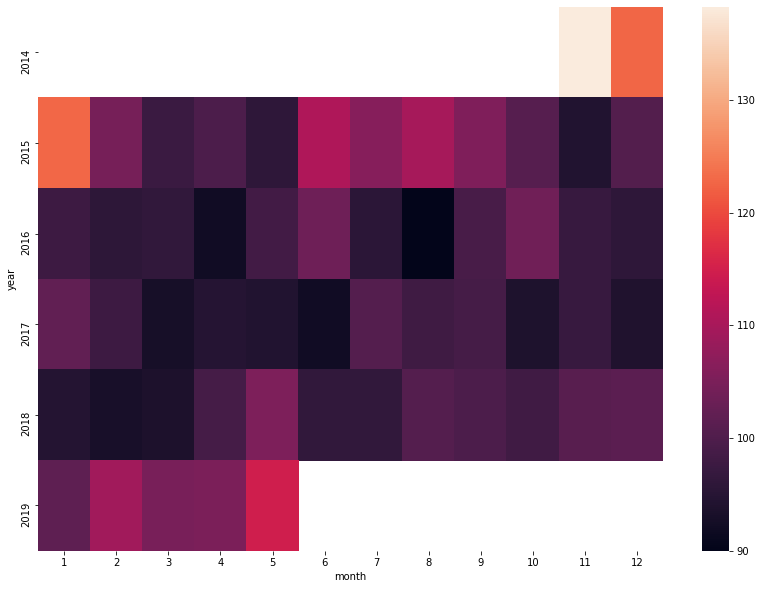

In [37]:
data_heat = data.pivot_table(index = "year",columns = "month", values= 'price_per_meter', aggfunc= 'mean')

ax = plt.subplots(figsize=(14, 10))
ax = sb.heatmap(data_heat)

Хитмэп позволяет детальнее ознакомиться с данными и отметить, что тенденция снижения средней цены не монотонна. И хотя выделить месяц или сезон, когда цена выше сложно, однако можно отметить, что в зимние месяцы цена, зачастую, ниже. 
Также можно увидеть, что цена на жильё начала постепенный рост начиная с марта 2018 г.

weekday,Вс.,Вт.,Пн.,Пт.,Сб.,Ср.,Чт.
price_per_meter,97.339063,98.469635,98.430817,98.713459,96.682175,98.524632,98.884407


Text(0.5, 1.0, 'Среднее значение цены за квартиру в разные дни недели')

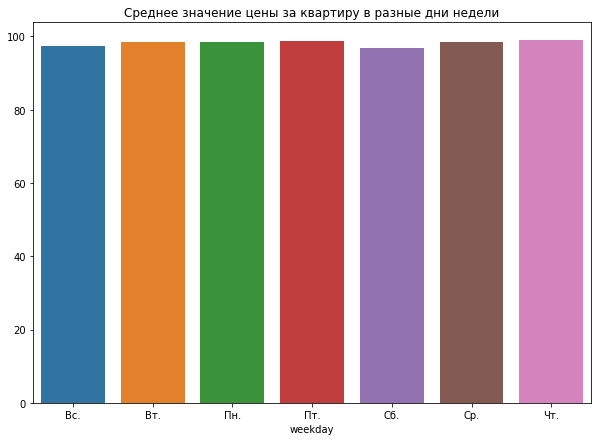

In [38]:
#Также изучите зависимость от даты размещения: дня недели, месяца и года. 

data_bar_week = data.pivot_table(columns = 'weekday', values= 'price_per_meter', aggfunc= 'mean')

ax = plt.subplots(figsize=(10, 7))
display(data_bar_week)
ax=sb.barplot(data=data_bar_week)
ax.set_title('Среднее значение цены за квартиру в разные дни недели')

Изучение столбчатой диаграммы зависимости цены от дня недели не показывает каких-либо ярко-выраженных закономерностей. Далее будет рассмотрен хитмэп.

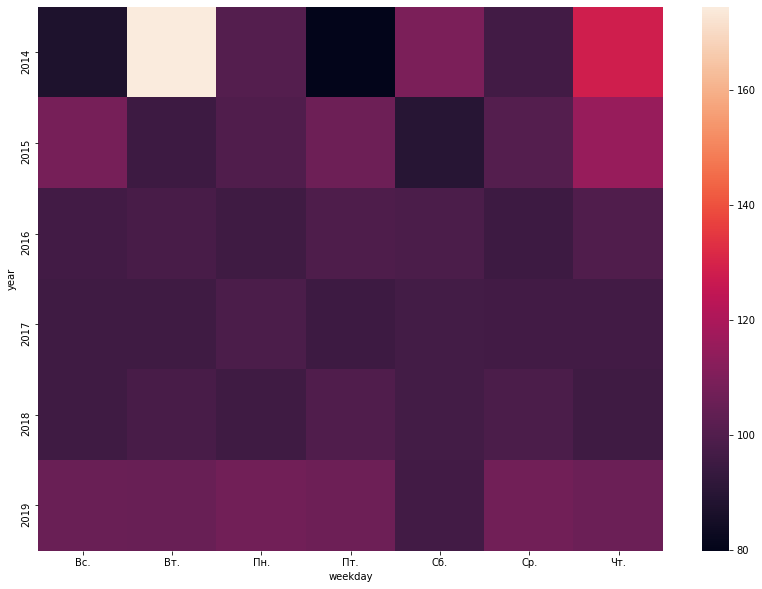

In [39]:
data_heat = data.pivot_table(index = "year",columns = "weekday", values= 'price_per_meter', aggfunc= 'mean')

ax = plt.subplots(figsize=(14, 10))
ax = sb.heatmap(data_heat)

Изучение хитмэпа с днями недели показывает аномалии в значениях за 2014 год.  Можно предположить, что это связано с тем, что данные представлены только за два месяца, однако, можно обратить внимание, что согласно открытым источникам, Яндекс.Недвижимость, откуда взяты данные, разрешили частным лицам самостоятельно публиковать объявления только с декабря 2014 года. Возможно предположить, что данный факт мог повлиять на среднюю цену в данных.
Если убрать из рассмотрения 2014 год, то можно заметить, что день, когда средняя цена за квадратный метр была меньше всего- это суббота. Однако, стоит отметить, что в процентном отношении разница не более 2 процентов. 


In [40]:
#Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. 

data_local = data['locality_name'].value_counts().head(11)

data_local = data_local.drop(labels = ['Санкт-Петербург'])

print("10 населённых пунктов с наибольшим количеством объявлений:")
display(data_local)

locality_top_ten = data_local.index

for i in locality_top_ten:
    local_mean = data.loc[data['locality_name']== i, 'price_per_meter'].mean()
    print('Средняя цена квадратного метра в населённом пункте',i, round(local_mean, 2), 'тысяч рублей.' )

10 населённых пунктов с наибольшим количеством объявлений:


Мурино               583
посёлок Шушары       438
Всеволожск           395
Пушкин               362
Колпино              336
посёлок Парголово    320
Гатчина              305
деревня Кудрово      292
Выборг               236
Петергоф             200
Name: locality_name, dtype: int64

Средняя цена квадратного метра в населённом пункте Мурино 86.07 тысяч рублей.
Средняя цена квадратного метра в населённом пункте посёлок Шушары 78.67 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Всеволожск 67.14 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Пушкин 102.2 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Колпино 75.53 тысяч рублей.
Средняя цена квадратного метра в населённом пункте посёлок Парголово 90.02 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Гатчина 68.84 тысяч рублей.
Средняя цена квадратного метра в населённом пункте деревня Кудрово 92.53 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Выборг 58.17 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Петергоф 84.03 тысяч рублей.


In [41]:
#Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 

data_top = data[['locality_name', 'price_per_meter']]

data_top = data_top.groupby(['locality_name']).mean().sort_values(['price_per_meter'])#(by= 'price_per_meter')

display(data_top)

,price_per_meter
locality_name,
деревня Старополье,11.000000
посёлок станции Свирь,11.500000
деревня Вахнова Кара,12.000000
деревня Выскатка,12.000000
деревня Малая Романовка,13.000000
...,...
Пушкин,102.204420
Сестрорецк,102.209040
посёлок Репино,104.250000


In [42]:
data.insert(25,'cityCenters_km', round(data['cityCenters_nearest']/ 1000))

cityCenters_km,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0
price_per_meter,231.807692,151.569892,147.307947,119.398844,130.946746,137.677492,145.448505,153.315403,123.871795,113.158163,112.504213,108.401198,107.530663,108.142265,104.191373,104.20526,100.351481,96.514253,96.871595,98.058065,103.081633,94.42735,91.268657,91.811765,85.730769,91.0,89.355556,132.0,80.857143,73.0


Text(0.5, 1.0, 'Среднее значение цены за квадратный метр для каждого километра от центра города')

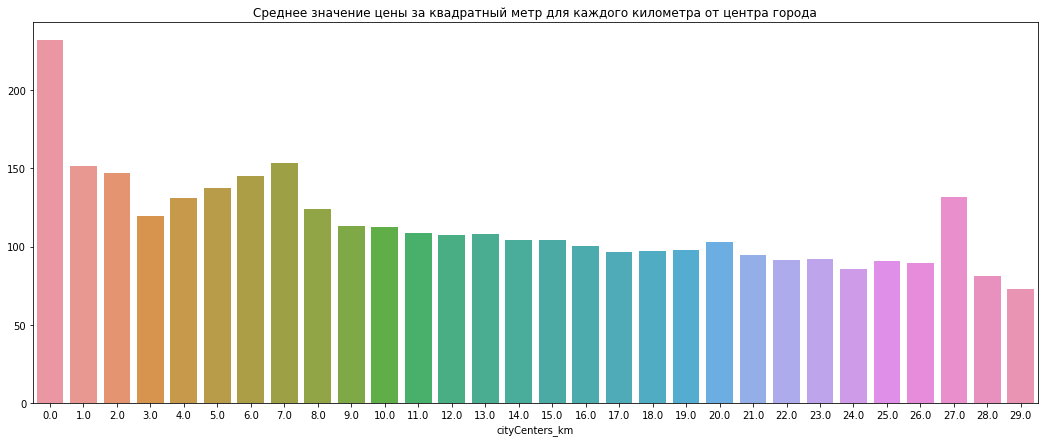

In [43]:
data_spb = data.loc[data['locality_name']== 'Санкт-Петербург'].pivot_table(columns = 'cityCenters_km', values= 'price_per_meter', aggfunc= 'mean')


ax = plt.subplots(figsize=(18, 7))
display(data_spb)
ax=sb.barplot(data=data_spb)
ax.set_title('Среднее значение цены за квадратный метр для каждого километра от центра города')


**Вывод**

Для выполнения поставленной задачи была построена столбчатая диаграмма. По ней видно, что значимый скачок цен происходит при переходе от нулевого к первому километру. Квартиры в радиусе километра от центра мы будем считать центром.

In [44]:
data_heart = data.loc[(data['locality_name']== 'Санкт-Петербург')& (data['cityCenters_nearest'] < 1000)]
data_city = data.loc[(data['locality_name']== 'Санкт-Петербург')& (data['cityCenters_nearest'] >= 1000)]

Площадь квартир
count 84.0   15391.0
mean 108.81166666666667   63.92299200831655
std 66.91990977952375   37.411067522486725
min 12.0   13.0
25% 70.67500000000001   41.9
50% 95.4   55.0
75% 125.525   74.0
max 483.9   517.0


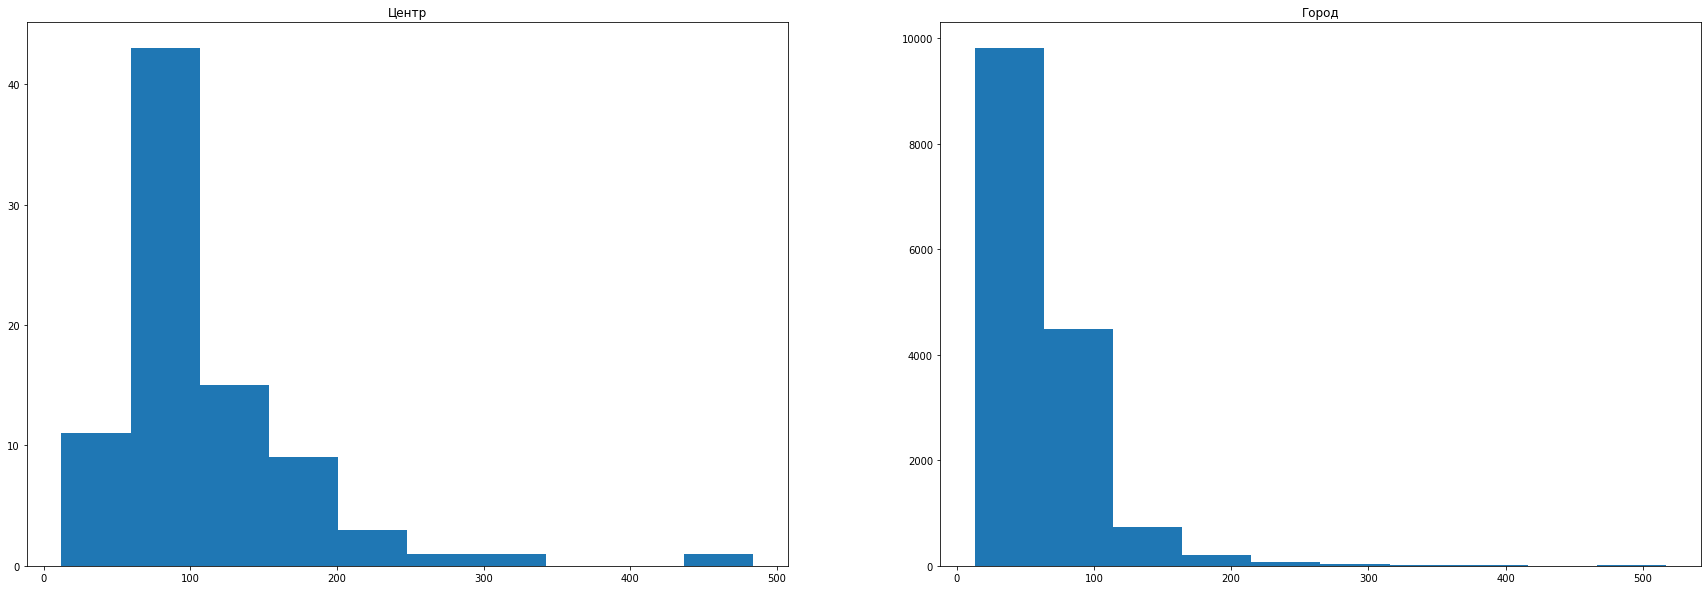

Цена жилья


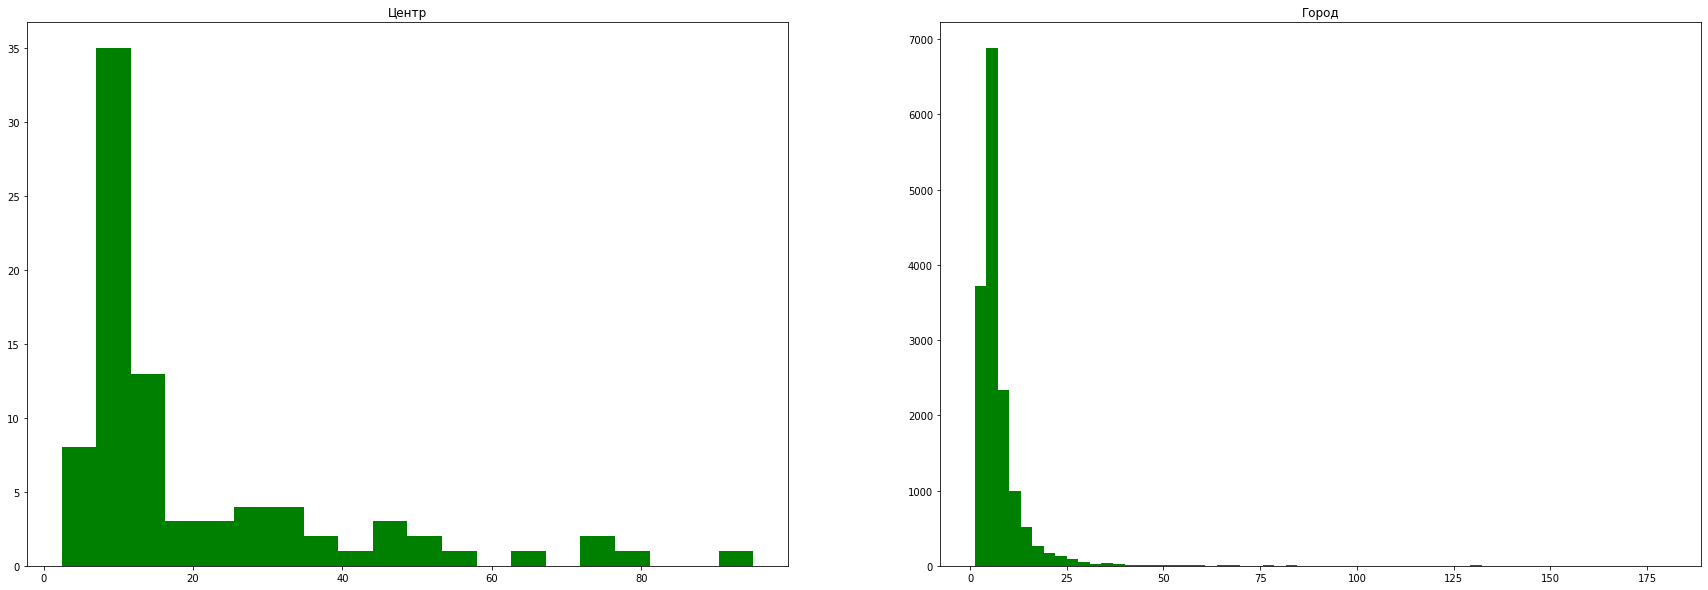

Количество комнат


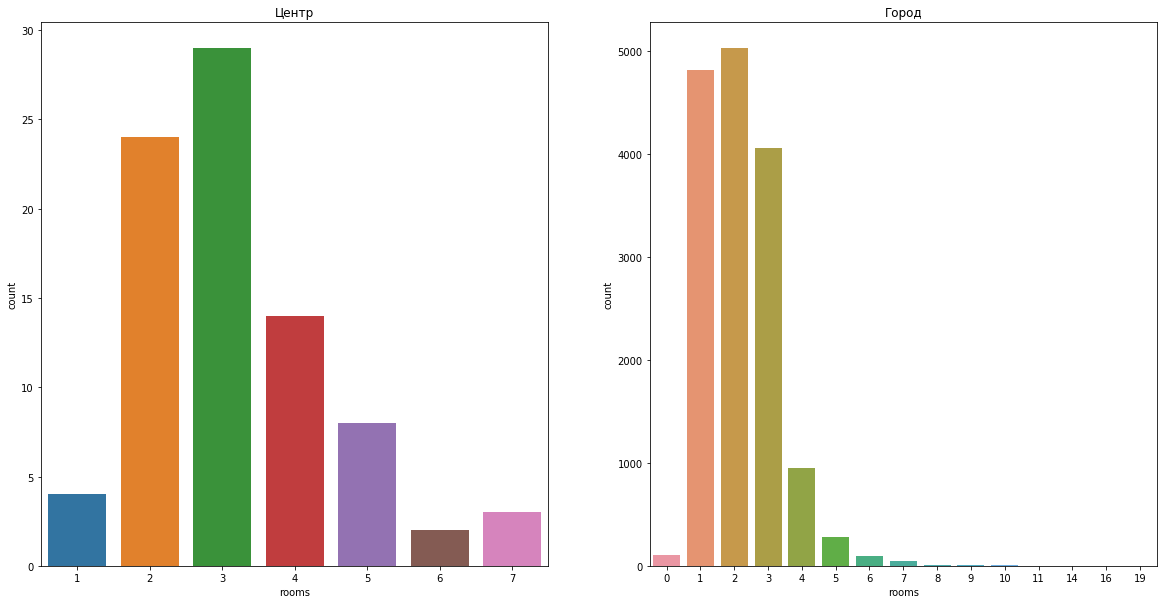

Высота потолков


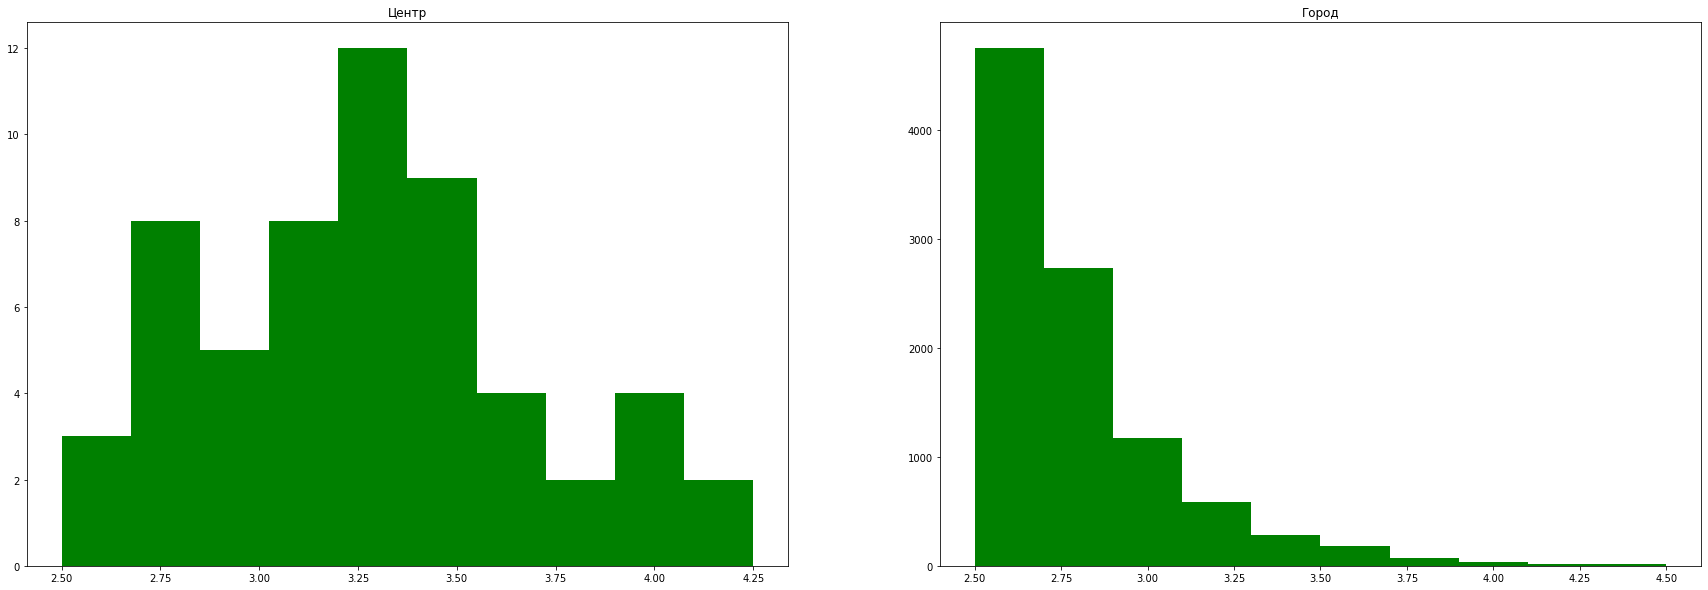

Категория этажа квартир


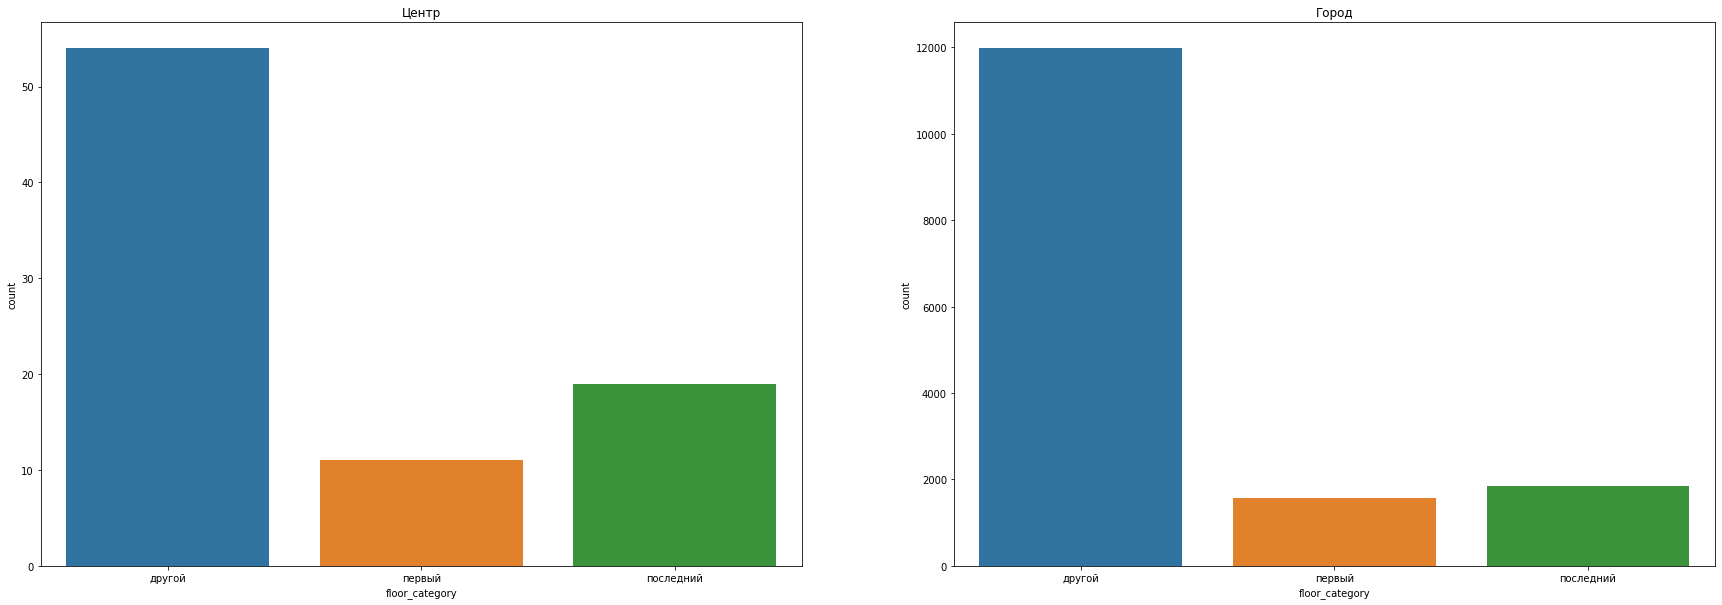

In [45]:
print('Площадь квартир')
for a in zip(['count','mean','std','min','25%','50%','75%','max'],
             data_heart['total_area'].describe(), 
             data_city['total_area'].describe()):
    print(a[0],a[1],' ',a[2])
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)
plt.title ("Центр")
ax=plt.hist(x='total_area', data= data_heart)

ax2 = fig.add_subplot(122)
plt.title ("Город")
ax2=plt.hist(x='total_area', data = data_city)
plt.show()

print('Цена жилья')
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)
plt.title ("Центр")
ax=plt.hist(x='last_price', data=data_heart,bins=20 ,facecolor='g')

ax2 = fig.add_subplot(122)
plt.title ("Город")
ax2=plt.hist(x='last_price', data = data_city,bins = 60 ,facecolor='g')
plt.show()


print('Количество комнат')
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
plt.title ("Центр")
ax=sb.countplot(x='rooms', data=data_heart)


ax2 = fig.add_subplot(122)
plt.title ("Город")
ax2=sb.countplot(x='rooms', data = data_city)
plt.show()



print('Высота потолков')
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)
plt.title ("Центр")
ax=plt.hist(x='ceiling_height', data=data_heart, facecolor='g')

ax2 = fig.add_subplot(122)
plt.title ("Город")
ax2=plt.hist(x='ceiling_height', data = data_city, facecolor='g')
plt.show()



print('Категория этажа квартир')
#ax=sb.countplot(x='floor_category', data=data_heart)

fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121)
plt.title ("Центр")
ax=sb.countplot(x='floor_category', data=data_heart)

ax2 = fig.add_subplot(122)
plt.title ("Город")
ax2=sb.countplot(x='floor_category', data = data_city)
plt.show()

<div style="border:solid green 2px; padding: 20px"> <b>Отлично V2:</b><br>
 Очень красивая визуализация у тебя получилась🔥

Графики по городу и центру расположены рядом, удобно сравнивать. Спасиюо за доработки!</div>  

Таблица рассеивания цены и количества комнат


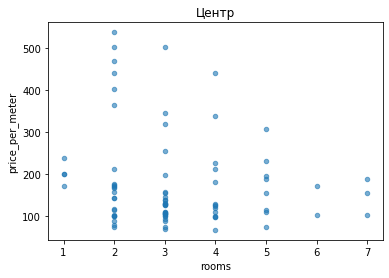

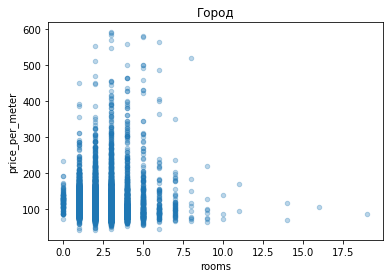

Таблица рассеивания цены и этажа


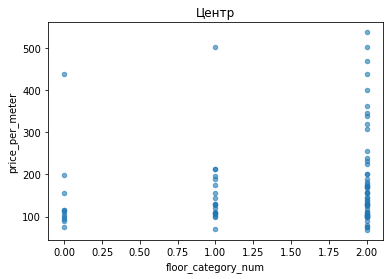

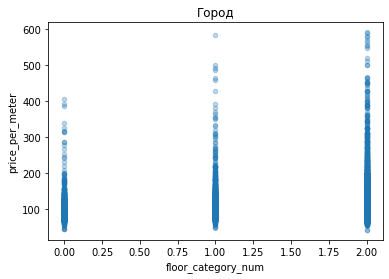

Таблица рассеивания цены и удалённости от центра


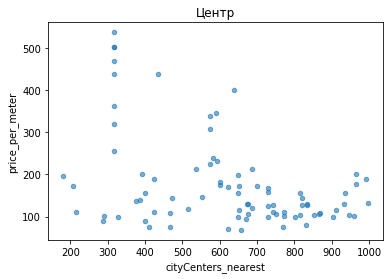

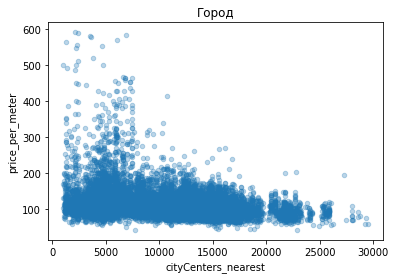

Хитмэп цен по датам размещения


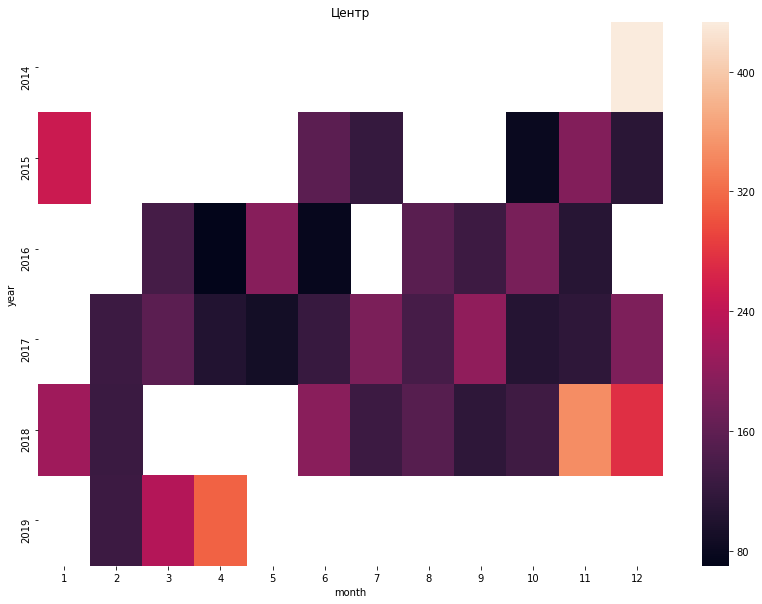

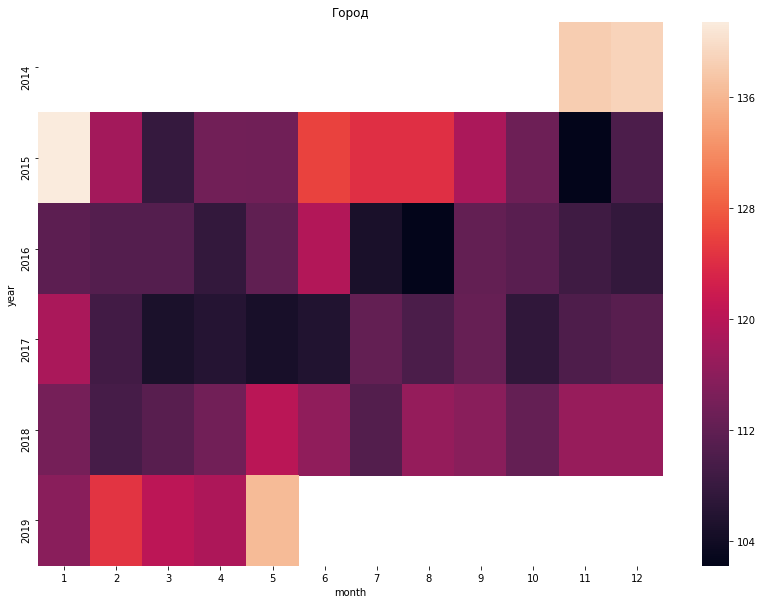

In [46]:
print('Таблица рассеивания цены и количества комнат')
data_heart.plot.scatter(x = 'rooms', y = 'price_per_meter', alpha = .6)
plt.title('Центр')
plt.show()

data_city.plot.scatter(x = 'rooms', y = 'price_per_meter', alpha = .3)
plt.title('Город')
plt.show()

print('Таблица рассеивания цены и этажа')
data_heart.plot.scatter(x = 'floor_category_num', y = 'price_per_meter', alpha = .6)
plt.title('Центр')
plt.show()

data_city.plot.scatter(x = 'floor_category_num', y = 'price_per_meter', alpha = .3)
plt.title('Город')
plt.show()

print('Таблица рассеивания цены и удалённости от центра')
data_heart.plot.scatter(x = 'cityCenters_nearest', y = 'price_per_meter', alpha = .6)
plt.title('Центр')
plt.show()

data_city.plot.scatter(x = 'cityCenters_nearest', y = 'price_per_meter', alpha = .3)
plt.title('Город')
plt.show()

print('Хитмэп цен по датам размещения')
ax = plt.subplots(figsize=(14, 10))
plt.title('Центр')
ax = sb.heatmap(data_heart.pivot_table(index = "year",columns = "month", values= 'price_per_meter', aggfunc= 'mean'))

ax = plt.subplots(figsize=(14, 10))
plt.title('Город')
ax = sb.heatmap(data_city.pivot_table(index = "year",columns = "month", values= 'price_per_meter', aggfunc= 'mean'))

 **Вывод**

Исходя из приведённых выше данных, можно сделать вывод, что площади квартир в центре, в среднем больше, чем по городу в целом, однако, стоит отметить, что минимальное по площади помещение тоже находится в центре города.
В центре наиболее частовстречающиеся предложения- это трёхкомнатные квартиры, в то время как по городу в целом более распространены квартиры с одной или двумя комнатами. 
Стоит обратить внимание, что в центре средняя высота потолков значительно выше, чем по городу в целом. Также доля квартир на последнем этаже больше, чем по городу.

При поиске факторов, наиболее влияющих на стоимость, можно отметить, что в негативном ключе играет категория этажа. Так в квартирах на первых этажах в центре, зачастую, стоимость квадратного метра ниже, чем на последнем этаже и, в особенности, этаже отличном от первого и последнего.

Стоимость в зависимости от даты весьма ощутима. Так мы можем видеть подъём цен в начале наблюдений (конец 2014) и конце наблюдений (конец 2018-первый квартал 2019). В то же время цены заметны спады цен на квартиры в центре, в то время, как цены на жильё за пределами центра росли. Так можно заметить, что в июне-июле 2015 цены на жильё в городе были выше среднего, в то время, как в центре цена была ниже среднего за изучаемый промежуток.

Можно получить, что ценообразование стоимости квартир в центре города незначительно, однако отличается, от ценообразования по городу в целом. 

**Вывод**

Были подробно изучены данные, построены различные графики, устанавливающие взаимосвязи между величинами и, как следствие, получены ответы на вопросы исследования. Подробнее с результатами работы с данным разделом можно ознакомиться в общем выводе.

## Общий вывод

Для обобщения полученных результатов 

В основе данного исследования лежит таблица "real_estate_data.csv", содержащая 22 столбца с 23699 строками. Значения в каждом столбце были изучены, приведены к виду, необходимому для исследования и, по возможности, заполнены недостающие значения, о чём можно убедиться в соответсвующей части исследования.

Важно отметить, что исследование проводилось в соответсвтии с хронологией, предложенной в документации к работе.

В ходе исследовательского анализа данных были проанализированы значения в столбцах-
-‘total_area'
-'last_price'
-'price_per_meter'
-'rooms'
-'ceiling_height'
-‘living_perc'
-'days_exposition'
Цель: выявить редкие и выбивающиеся значения для того чтобы убрать их из дальнейшего рассмотрения.

Столбец ‘total_area' содержит 23699 ненулевых значения. Диаграмма размаха показывает большое количество выбросов справа от межквартильного размаха. Для дальнейшего исследования будут убраны значения превышающие 550 метров квадратных.


Обратим внимание на столбец 'last_price’. Он тоже содержит 23699 ненулевых значения. Для него также характерны «выбросы» за пределами межквартильного размаха.  Исходя из диаграммы размаха, из исследования будут удалены значения, превышающие 200 млн. рублей за квартиру.

Далее изучим подробнее значения в столбце 'price_per_meter’. Именно на этом столбце мы заострим наше внимание. Цена за квадратный метр является более универсальной характеристикой,  позволяющей сравнить цену за квартиру с большим метражом с ценой квартиры с малым метражом. 
При помощи диаграммы размаха мы можем установить, что существуют выбросы по цене не только справа от межквартильного размаха, но и справа от него. 

Примем во внимание, что в исследовании есть две категории: квартиры в Санкт-Петербурге и Ленинградской области. Эти данные неоднородны, что может привести к некорректной интерпретации понятия выброс. Поэтому в исследовании были приведены две диаграммы размаха. Для Санкт-Петербурга и Ленинградской области.

Объявления с ценой превышающей 750 тысяч рублей за один квадратный метр будут исключены из исследования как выбросы.

Столбец ‘rooms' содержит 23699 ненулевых значений. Здесь также наблюдаются значения за пределами межквартильного размаха, однако выявить значения сильно выбивающиеся из общей картины не получилось. Изучение количества комнат и их средней площади говорит о правдоподобности подобных значений.

Столбец 'ceiling_height’ имеет 14257 значений в промежутке от 1 до 100 метров. Изучение государственных нормативов по высоте потолков показало, что ниже 2,5 метров потолки не делаются. При этом, строгих нормативов о максимальной высоте потолков нет. Однако, исходя из общей практики, потолки не делают высотой более 4 метров. из исследования будут удалены значения, превышающие 4,5 метра и не достигающие 2,5 метров

Столбец ‘living_perc' показывает отношение жилой площади к общей площади помещения. Диаграмма размаха показала большое количество выбросов как слева, так и справа от межквартильного размаха. Однако выбросами мы будем считать только значения, находящиеся значительно левее межквартильного размаха, т.е. менее 30%


Столбец ’days_exposition' имеет 20518 значений. Медиананное значение - 95 дней.  На гистограмме мы видим, что мода находится в промежутке 40-50 дней. Отдельно отметим, что Q1, первый квартиль равен 45. Из всего вышесказанного мы делаем вывод, что обычно продажа занимает от 40 до 232 дней. Если продажа занимает менее 40 дней, то можно говорить, что продажа прошла быстро. Если продажа затягивается на срок более 232 дней, значит продажа проходила необычно долго.

По итогу отметим, что в данных существовали аномалии, которые могли негативно отразиться на итоговом выводе. Однако их процент не велик. После удаления всех выявленных выбросов мы сохранили 98.9% исходного датасета.

Далее  приступим к проработке гипотез исследования.

- Какие факторы больше всего влияют на стоимость квартиры? 

Для определения факторов, влияющих на цену, был рассчитан коэффициент корреляции между общей площадью, числом комнат, удалённостью от центра, категорией этажа, удалённостью от центра и ценой. 

Отметим, что наибольшую степень корреляции с ценой, характеризуемую как сильная, имеет общая площадь. Также существует средняя связь между ценой и площадью кухни и умеренная с числом комнат. Связь между этажом и ценой очень слабая. Однако, то, что значение коэффициента корреляции больше нуля говорит о том, что цена имеет прямую пропорциональную зависимость с возрастанием этажа, для первого этажа характерна тенденция к незначительному снижению цены. 
Отдельно рассмотрим взаимосвязь между расстоянием до центра и ценой. Изначально коэффициент корреляции меньше нуля, что говорит об обратной пропорциональной зависимости, однако, его абсолютное значение стремится к нулю. В таком случае, для корректности рассчётов разделим значения для квартир в Санкт- Петербурге и Ленинградской области. Полученные значения коэффициента корреляции говорят об умеренной взаимосвязи близости объекта от центра с ценой за помещение в пределах Санкт-Петербурга и слабой данной взаимосвязи за пределами Санкт-Петербурга.

- Изучите зависимость от даты размещения: дня недели, месяца и года.

Для установления взаимосвязей цены и даты были построены столбчатые диаграммы и хитмэпы.

На столбчатой диаграмме видно, что существует неустойчивая тенденция к снижению средней цены на жильё.
Хитмэп позволяет детальнее ознакомиться с данными и отметить, что данная тенденция не монотонна. И хотя выделить месяц или сезон, когда цена выше сложно, однако можно отметить, что в зимние месяцы цена, зачастую, ниже. 
Также можно увидеть, что цена на жильё начала постепенный рост начиная с марта 2018 г.

Изучение столбчатой диаграммы с днями недели показывает, что аномалии в значениях за 2014 год.  Можно предположить, что это связано с тем, что данные представлены только за два месяца, однако, можно обратить внимание, что согласно открытым источникам, Яндекс.Недвижимость, откуда взяты данные, разрешили частным лицам самостоятельно публиковать объявления только с декабря 2014 года (https://ru.wikipedia.org/wiki/%D0%AF%D0%BD%D0%B4%D0%B5%D0%BA%D1%81.%D0%9D%D0%B5%D0%B4%D0%B2%D0%B8%D0%B6%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C). Возможно предположить, что данный факт мог повлиять на среднюю цену в данных.
Если убрать из рассмотрения 2014 год, то можно заметить, что день, когда средняя цена за квадратный метр была меньше всего- это суббота. Однако, стоит отметить, что в процентном отношении разница не более 2 процентов. 

- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах

Приведём список из десяти населённых пунктов с указанием средней цены за квадратный метр в этом населённом пункте:

Средняя цена квадратного метра в населённом пункте Мурино 86.07 тысяч рублей.
Средняя цена квадратного метра в населённом пункте посёлок Шушары 78.67 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Всеволожск 67.14 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Пушкин 102.2 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Колпино 75.53 тысяч рублей.
Средняя цена квадратного метра в населённом пункте посёлок Парголово 90.02 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Гатчина 68.84 тысяч рублей.
Средняя цена квадратного метра в населённом пункте деревня Кудрово 92.53 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Выборг 58.17 тысяч рублей.
Средняя цена квадратного метра в населённом пункте Петергоф 84.03 тысяч рублей.

Отметим, что не считая Выборга, все города находятся в непосредственной близости от Санкт-Петербурга или являются административной единицей города федерального значения Санкт-Петербурга (например, Пушкин).
И именно в Выборге наименьшая средняя цена за квадратный метр среди десяти вышеперечисленных городов.

- Выделите населённые пункты с самой высокой и низкой стоимостью жилья. 

Для выполнения этой задачи были выведены средние значения цен за квадратный метр в каждом населённом пункте, отсортированные в порядке возрастания.

Согласно полученным данным, наименьшая цена за один квадратный метр - 11 т.р. в населённом пункте: «деревня Старополье». 
Согласно русской википедии, это населённый пункт с населением 823 чел. (на 2017 год), расположенный на юго-западе Ленинградской области. В деревне пять многоквартирных домов и несколько десятков частных домой.

Населённый пункт с самой высокой средней ценой за квадратный метр- посёлок Лисий нос. Расположен на берегу северном Финского залива и входит в состав города Санкт-Петербурга. Население около 4600 человек (на 2021 год)

- Выяснить, какая область входит в центр. Посчитайте среднюю цену для каждого километра. Постройте график. Определите границу, где график сильно меняется.

Для выполнения поставленной задачи, согласно заданию, была построена столбчатая диаграмма. По ней видно, что значимый скачок цен происходит при переходе от нулевого к первому километру. Обратим внимание, что по построению в нулевой километр входя квартиры с расстоянием до центра менее 500м. Таких квартир в датасете 27. Дополнительно отметим, что средняя цена за кв. метр в радиусе 500 м. от центра: 246 тысяч рублей. В то же время средняя цена квадратного метра в радиусе километра 182 т.р. Цена квадратного метра в радиусе двух километров от центра 145 т.р. квартир, в радиусе 1 км. от центра 84. Поэтому для сохранения репрезентативности были сохранены и два типа данных: для квартир в радиусе 500м. от центра и в радиусе одного километра от центра.

Для обоих групп значений можно увидеть , что наиболее распространены предложения с 2 или 3 комнатами, на этаже категории другой (не первый и не последний). Значимые пики в таблице распределения на отметке 300 метров от центра и 600-700 м. от центра.  Важно отметить, что если брать квартиры из радиуса в 1 км. то новые предложения о продаже там появляются регулярно. В радиусе 500 м. от центра появляются новые предложения, однако невозможно сказать о наличие постоянства наличия новых предложений.